In [20]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [21]:
# Install YOLOv5 dependencies
!pip install torch torchvision torchaudio --quiet
!pip install opencv-python matplotlib --quiet

# Clone YOLOv5 repository to use pre-trained model
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt --quiet

C:\Users\ASUS\AppData\Roaming\Python\Python312\Scripts\yolov5\yolov5


Cloning into 'yolov5'...


In [22]:
# Imports
import torch
import cv2
import numpy as np
from IPython.display import display, clear_output
from PIL import Image
import time


In [23]:
# Load YOLOv5s model from Ultralytics via torch.hub
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True, trust_repo=True)
model.eval()

# Get class labels
class_names = model.names



Using cache found in C:\Users\ASUS/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2025-5-29 Python-3.12.6 torch-2.7.0+cpu CPU

100%|██████████████████████████████████████████████████████████████████████████████████████████| 14.1M/14.1M [00:01<00:00, 13.5MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


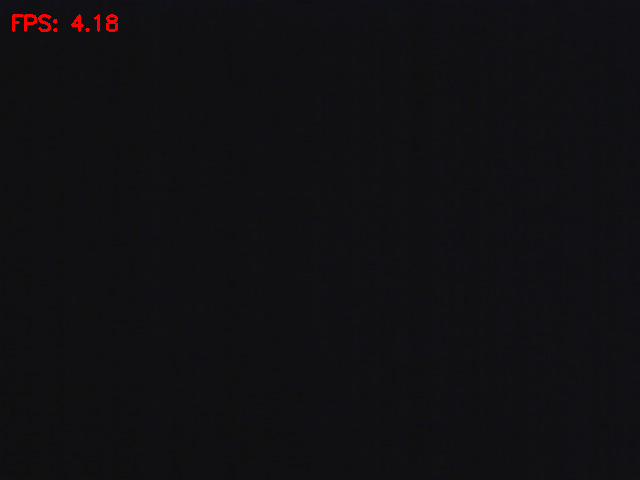

Webcam released.
Average FPS during webcam detection: 3.86

⚠️ Webcam performance too low or not working properly.
Falling back to image detection on sample images instead.

Detecting objects in image: https://ultralytics.com/images/zidane.jpg


image 1/1: 720x1280 2 persons, 1 tie, 1 cell phone
Speed: 5.0ms pre-process, 193.2ms inference, 14.6ms NMS per image at shape (1, 3, 384, 640)


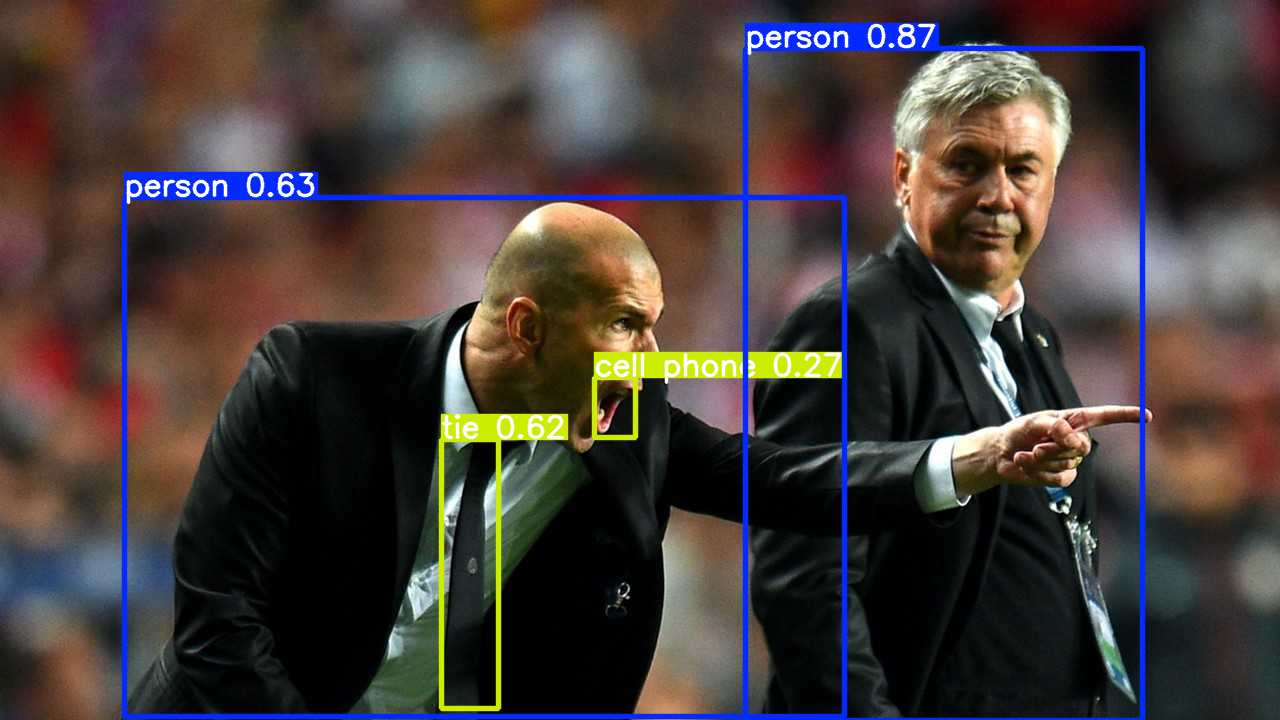

In [24]:
# YOLOv5 Real-Time Object Detection with Webcam and Fallback to Image URL

# Note: This code was implemented as part of my internship project.
# The webcam detection is attempted first. If the webcam fails (e.g., black screen,
# very low FPS), the program falls back to detecting objects on sample images from URLs.

import torch
import cv2
from IPython.display import display, clear_output
from PIL import Image
import time
import requests
from io import BytesIO

# Load pretrained YOLOv5s model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True, trust_repo=True)
model.eval()

class_names = model.names  # COCO object classes

# Attempt to open webcam (index 0)
cap = cv2.VideoCapture(0)

# Set webcam resolution for better FPS
cap.set(3, 640)  # width
cap.set(4, 480)  # height

frame_limit = 100
frame_count = 0

print("Starting webcam detection...")

fps_list = []  # store FPS for analysis

while frame_count < frame_limit:
    start = time.time()
    ret, frame = cap.read()
    if not ret:
        print("❌ Failed to grab frame from webcam.")
        break

    # Convert frame BGR to RGB for model input
    img_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    results = model(img_rgb)
    detections = results.xyxy[0]

    # Draw bounding boxes with labels
    for *box, conf, cls in detections:
        x1, y1, x2, y2 = map(int, box)
        label = class_names[int(cls)]
        confidence = float(conf)

        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        text = f"{label} {confidence:.2f}"
        cv2.putText(frame, text, (x1, y1 - 8),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    fps = 1.0 / (time.time() - start)
    fps_list.append(fps)

    cv2.putText(frame, f"FPS: {fps:.2f}", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

    # Convert to RGB and display in notebook
    display_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    clear_output(wait=True)
    display(Image.fromarray(display_frame))

    frame_count += 1

cap.release()
print("Webcam released.")

# Analyze FPS to detect performance issues
avg_fps = sum(fps_list) / len(fps_list) if fps_list else 0
print(f"Average FPS during webcam detection: {avg_fps:.2f}")

# If FPS too low or no frames detected properly, fallback to image detection
if avg_fps < 5 or frame_count == 0:
    print("\n⚠️ Webcam performance too low or not working properly.")
    print("Falling back to image detection on sample images instead.\n")

    def detect_image_from_url(url):
        try:
            response = requests.get(url)
            img = Image.open(BytesIO(response.content))
            results = model(img)
            results.print()  # print detected objects
            results.show()   # display image with bounding boxes
        except Exception as e:
            print(f"Error processing image from {url}: {e}")

    sample_images = [
        'https://ultralytics.com/images/zidane.jpg',
        # Add more sample image URLs if needed
    ]

    for img_url in sample_images:
        print(f"Detecting objects in image: {img_url}")
        detect_image_from_url(img_url)

else:
    print("Webcam detection completed successfully with acceptable FPS.")


image 1/1: 1080x810 4 persons, 1 bus
Speed: 18.2ms pre-process, 300.3ms inference, 0.0ms NMS per image at shape (1, 3, 640, 480)


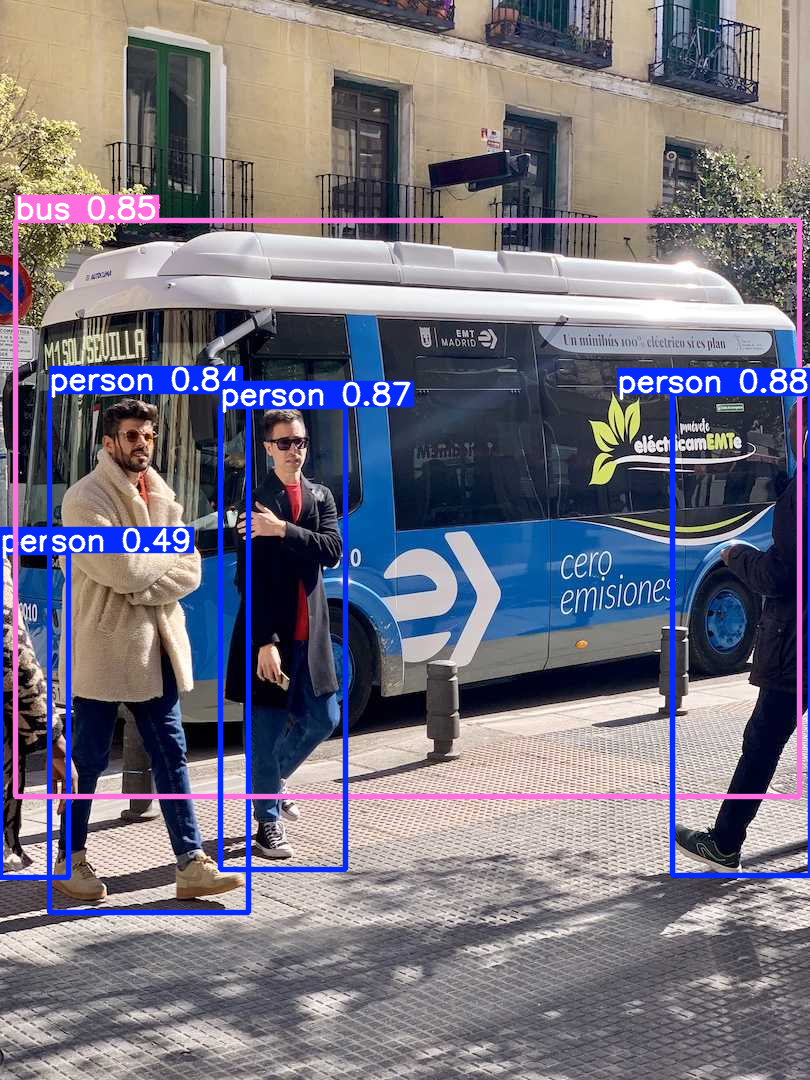

In [25]:
# Import required libraries
import requests
from PIL import Image
from io import BytesIO

# Set a sample Ultralytics image URL
image_url = 'https://ultralytics.com/images/bus.jpg'

try:
    # Download image using requests
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))  # Open image using PIL

    # OPTIONAL: adjust thresholds before running detection
    model.conf = 0.4  # confidence threshold (default is 0.25)
    model.iou = 0.45  # IoU threshold for NMS (default is 0.45)

    # Run detection
    results = model(img)  # This runs inference
    results.print()       # Print detection results
    results.show()        # Display image with bounding boxes

except Exception as e:
    print("❌ Could not load or process the image:", e)





In [29]:
# Import required libraries
import requests
from PIL import Image
from io import BytesIO

# Load image
image_url = 'https://ultralytics.com/images/bus.jpg'
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))

# Run detection
results = model(img)  # Assumes YOLOv5 model is already loaded

# Extract predictions as DataFrame
predictions = results.pandas().xyxy[0]  # Includes 'name' column

# Ground truth objects in the image (defines them manually for simple test)
ground_truth_classes = ['person', 'bus']

# Get predicted object class names
predicted_classes = predictions['name'].tolist()

# Calculate metrics
true_positives = len([cls for cls in predicted_classes if cls in ground_truth_classes])
false_positives = len([cls for cls in predicted_classes if cls not in ground_truth_classes])
false_negatives = len([cls for cls in ground_truth_classes if cls not in predicted_classes])

# Avoid division by zero with small epsilon
precision = true_positives / (true_positives + false_positives + 1e-6)
recall = true_positives / (true_positives + false_negatives + 1e-6)

# Print results
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")



Precision: 1.00
Recall: 1.00


In [30]:
# Import necessary libraries
import torch
import requests
from PIL import Image
from io import BytesIO
import warnings
import os

# Suppress warnings
warnings.filterwarnings("ignore")

# Load YOLOv5 model (pretrained)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')


Using cache found in C:\Users\ASUS/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2025-5-29 Python-3.12.6 torch-2.7.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


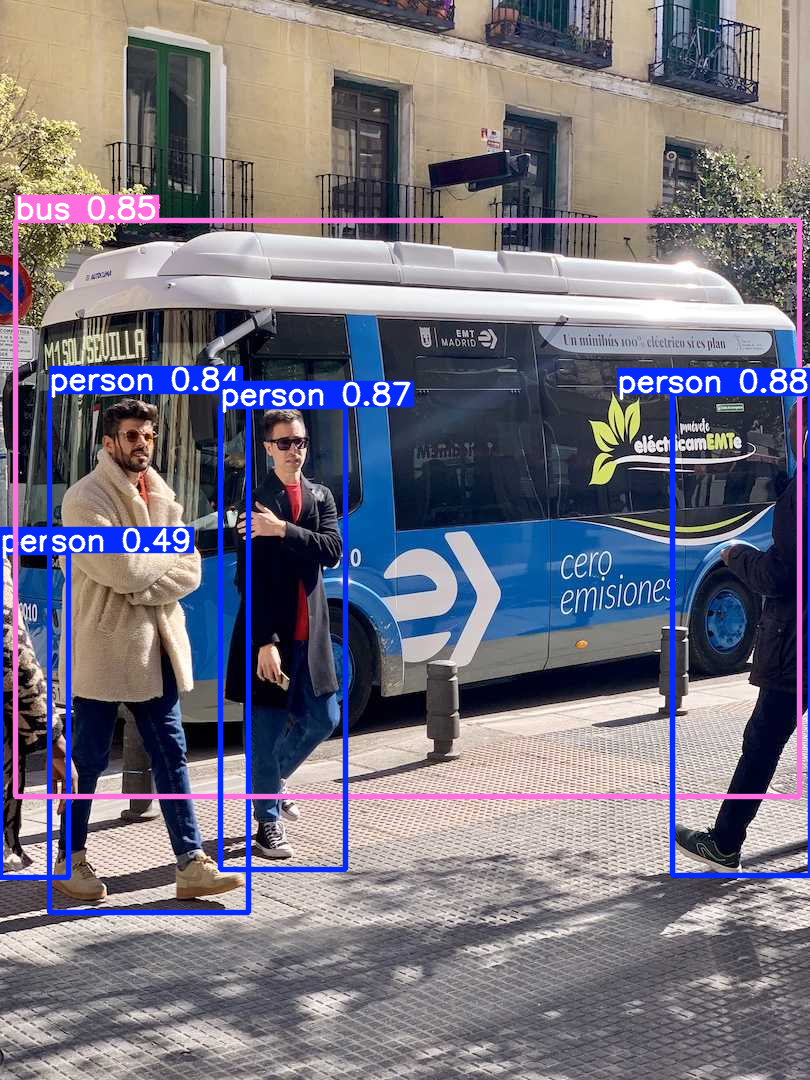

Saved 1 image to yolo_output


In [31]:
# Image URL to test on
image_url = 'https://ultralytics.com/images/bus.jpg'

# Load and run detection
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))

# Run detection
results = model(img)

# Show results and save output image
results.show()  # display inline in notebook
results.save(save_dir='yolo_output')  # saved image with boxes in 'yolo_output' folder


In [32]:
# List of multiple image URLs
image_urls = [
    'https://ultralytics.com/images/bus.jpg',
    'https://ultralytics.com/images/zidane.jpg',
    'https://ultralytics.com/images/bicycle.jpg'
]

# Directory to save outputs
output_dir = 'yolo_outputs_multi'
os.makedirs(output_dir, exist_ok=True)

# Loop through and process each image
for idx, url in enumerate(image_urls):
    try:
        print(f"Processing image {idx+1}...")
        resp = requests.get(url)
        img = Image.open(BytesIO(resp.content))
        results = model(img)
        results.save(save_dir=output_dir)
    except Exception as e:
        print(f"❌ Error processing image {idx+1}: {e}")


Processing image 1...


Saved 1 image to yolo_outputs_multi2


Processing image 2...


Saved 1 image to yolo_outputs_multi3


Processing image 3...
❌ Error processing image 3: cannot identify image file <_io.BytesIO object at 0x0000018E28E1D260>
